In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

In [10]:
# Assuming data is already in a DataFrame called df
df = pd.read_csv("/content/synthetic_multivariate_dataset_extended.csv")  # Or use your DataFrame directly
print(df.head())


   Age    Income  SpendingScore  NumPurchases  CreditScore  Gender   City  \
0   56  35903.31          99.64             6       627.17    Male  CityB   
1   69  63051.95          37.46             4       678.92    Male  CityC   
2   46  48654.74          45.41             6       634.29  Female  CityA   
3   32  38666.19          72.49             2       739.67  Female  CityC   
4   60  50301.41          88.73             5       720.93  Female  CityB   

   IsSubscribed MaritalStatus  YearsWithCompany  HasCreditCard  \
0             0       Married                27              1   
1             0      Divorced                30              1   
2             0       Married                31              1   
3             0        Single                19              1   
4             0      Divorced                39              1   

   SatisfactionScore  Target  
0               7.66  173.73  
1               8.84  182.37  
2               6.71  166.68  
3               

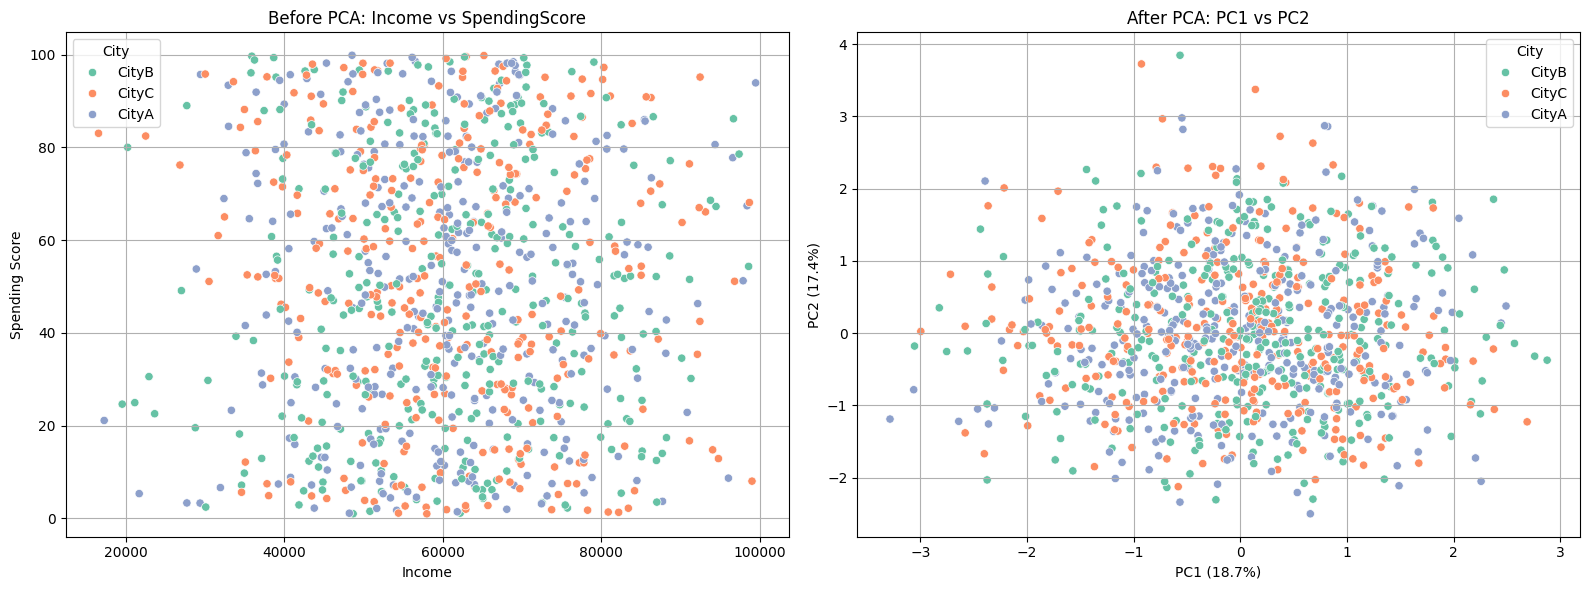

In [12]:
# Assuming data is already in a DataFrame called df
df = pd.read_csv("/content/synthetic_multivariate_dataset_extended.csv")  # Or use your DataFrame directly

# Select numerical columns for PCA
features = ['Age', 'Income', 'SpendingScore', 'NumPurchases', 'CreditScore', 'SatisfactionScore']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components and the 'City' column for hue
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['City'] = df['City']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before PCA
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='City', ax=axes[0], palette='Set2')
axes[0].set_title("Before PCA: Income vs SpendingScore")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Spending Score")
axes[0].grid(True)

# After PCA
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='City', ax=axes[1], palette='Set2')
axes[1].set_title("After PCA: PC1 vs PC2")
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

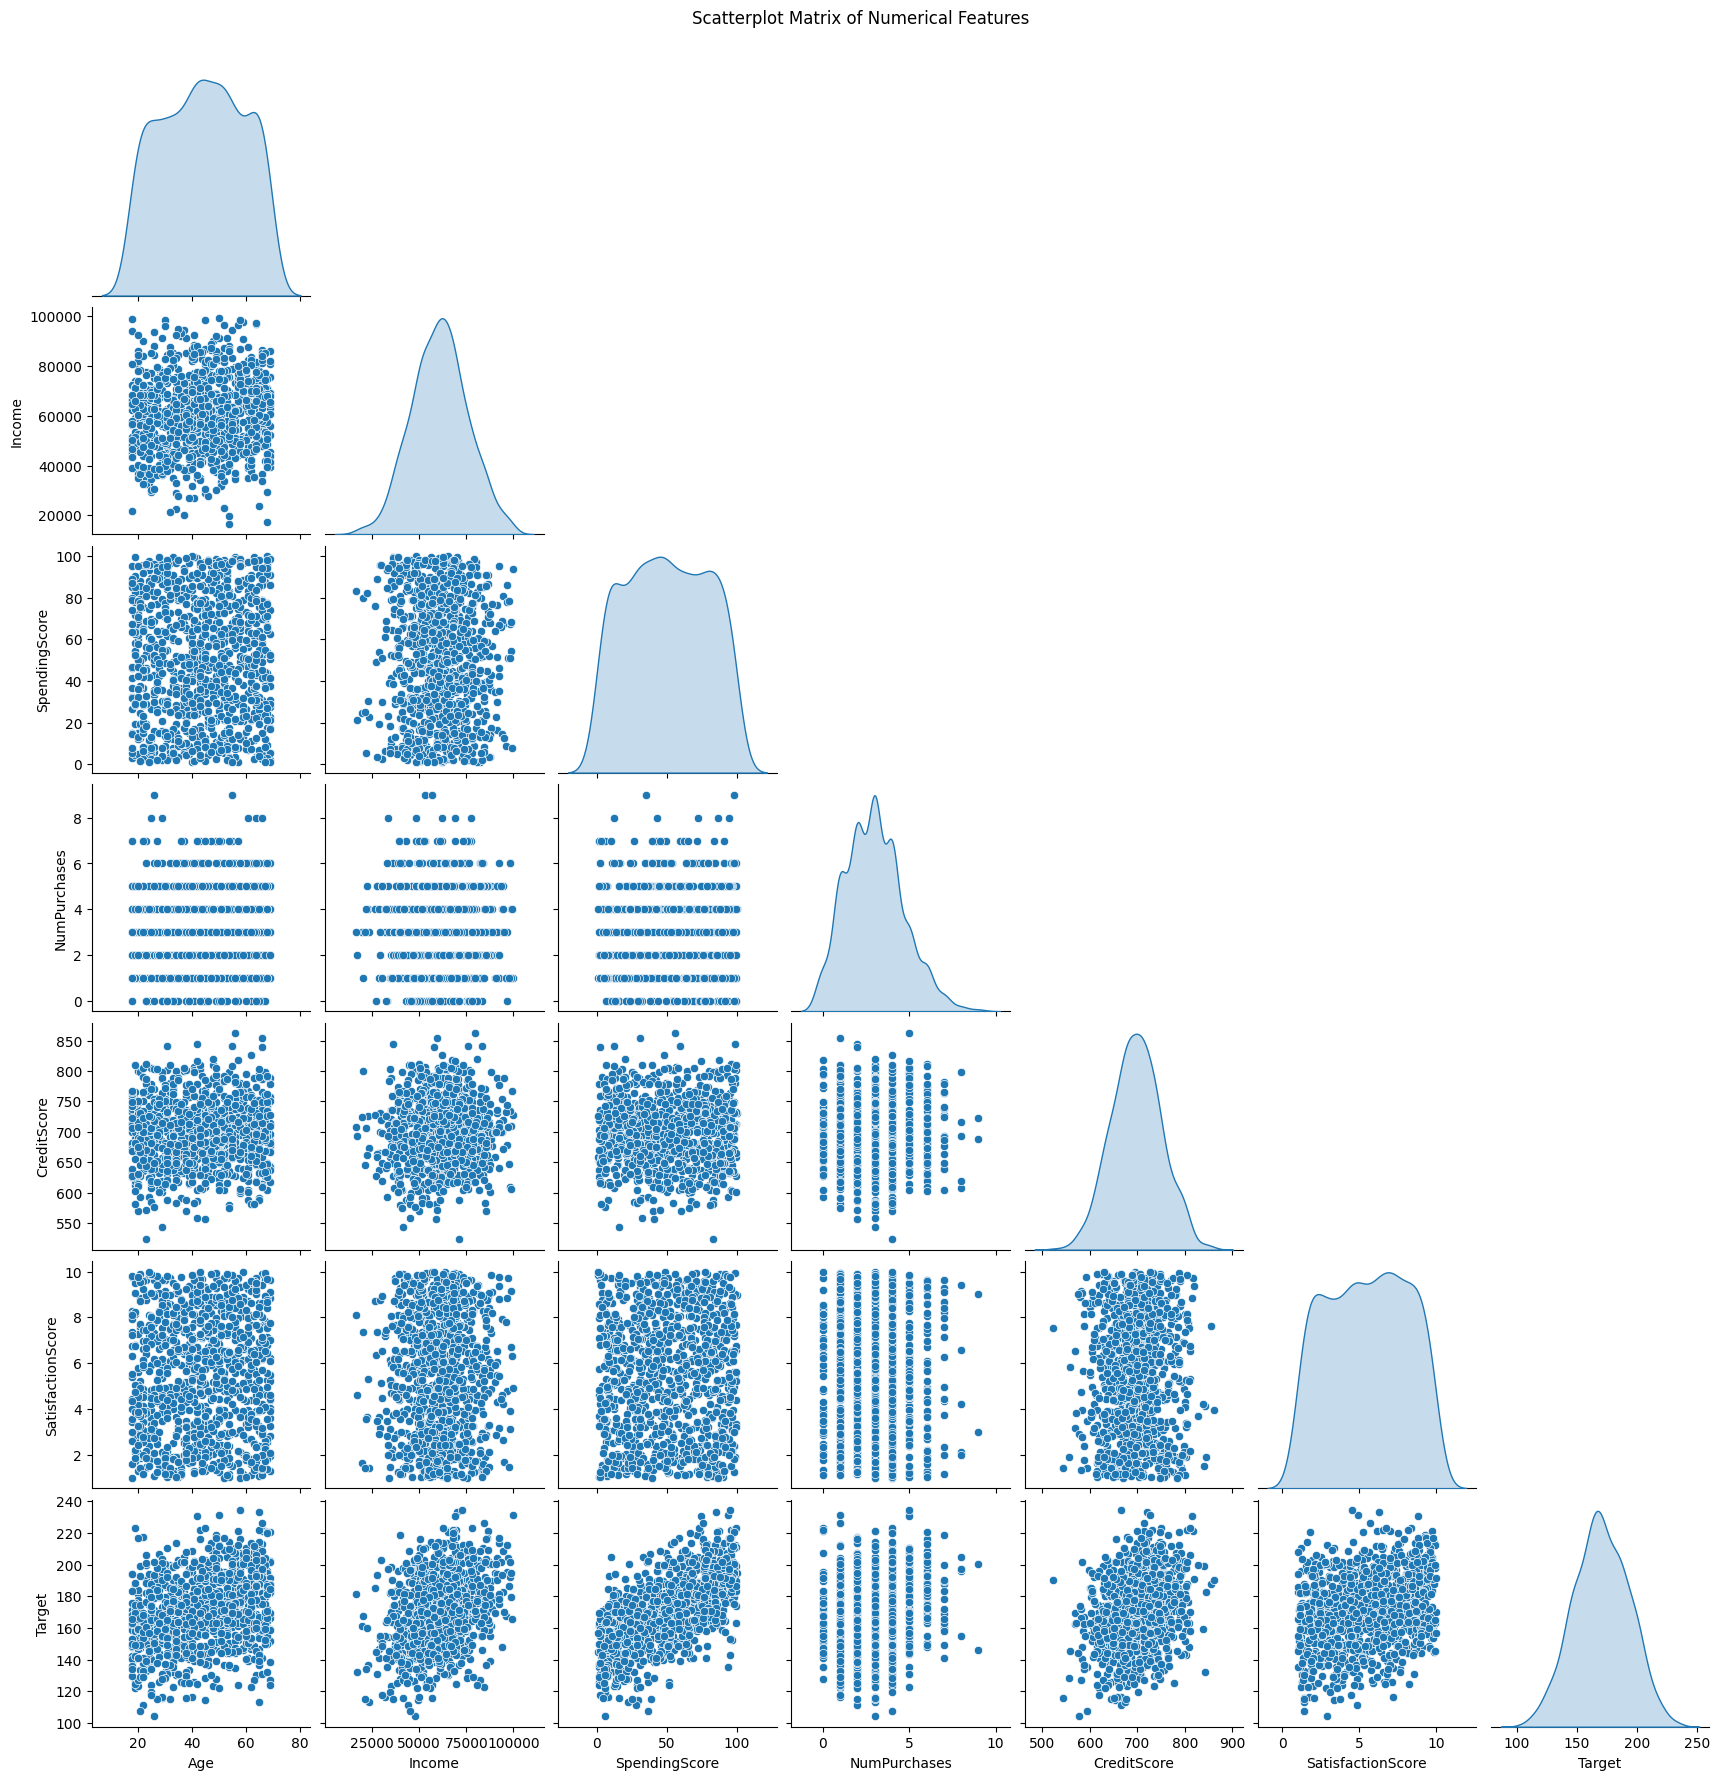

In [13]:
# Select numerical columns
num_cols = ['Age', 'Income', 'SpendingScore', 'NumPurchases', 'CreditScore', 'SatisfactionScore', 'Target']

sns.pairplot(df[num_cols], corner=True, diag_kind='kde')
plt.suptitle("Scatterplot Matrix of Numerical Features", y=1.02)
plt.show()


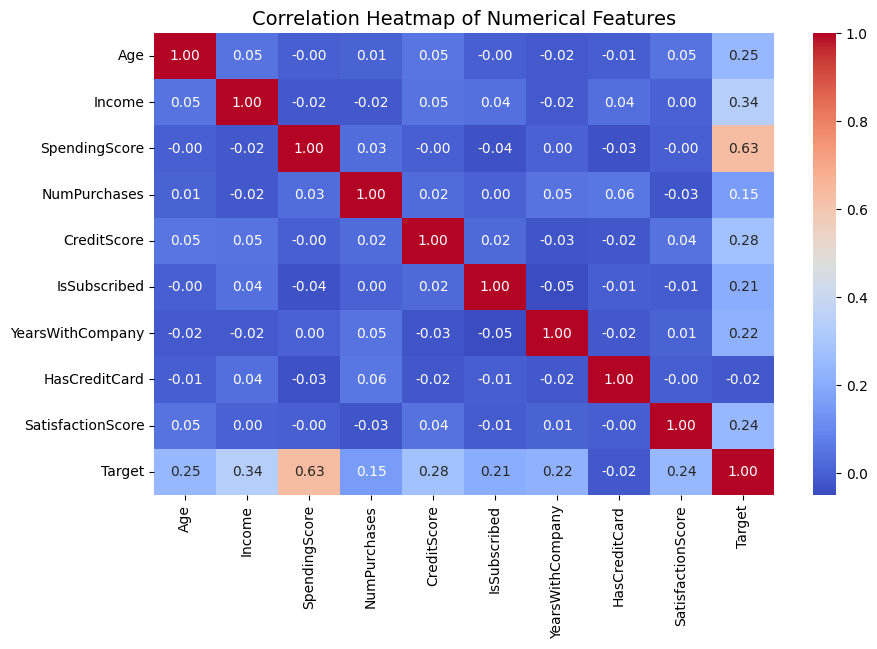

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming data is already in a DataFrame called df
df = pd.read_csv("/content/synthetic_multivariate_dataset_extended.csv")  # Or use your DataFrame directly

# Compute correlation
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

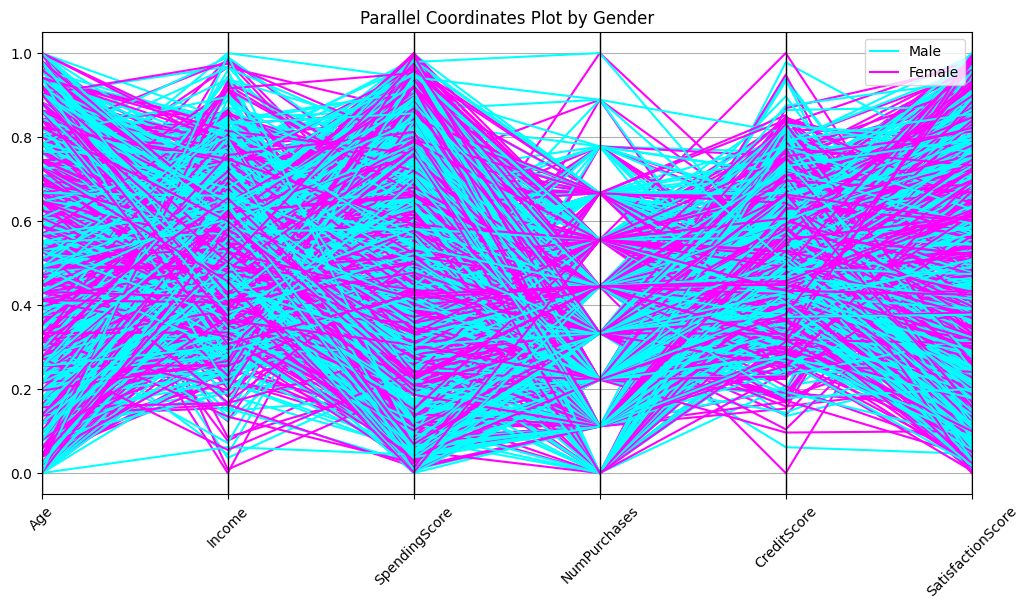

In [15]:
# Normalize data for better scale comparison
from sklearn.preprocessing import MinMaxScaler

features = ['Age', 'Income', 'SpendingScore', 'NumPurchases', 'CreditScore', 'SatisfactionScore']
df_scaled = df.copy()
df_scaled[features] = MinMaxScaler().fit_transform(df[features])

# Add categorical column for color grouping (e.g., Gender or City)
plt.figure(figsize=(12, 6))
parallel_coordinates(df_scaled[['Gender'] + features], 'Gender', colormap='cool')
plt.title("Parallel Coordinates Plot by Gender")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


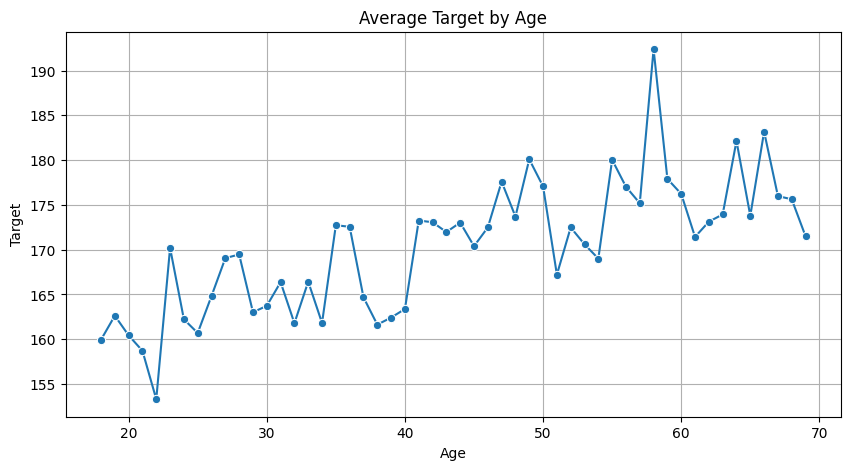

In [16]:
# Line plot of average Target over Age
age_grouped = df.groupby('Age')['Target'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=age_grouped, x='Age', y='Target', marker='o')
plt.title('Average Target by Age')
plt.xlabel('Age')
plt.ylabel('Target')
plt.grid(True)
plt.show()


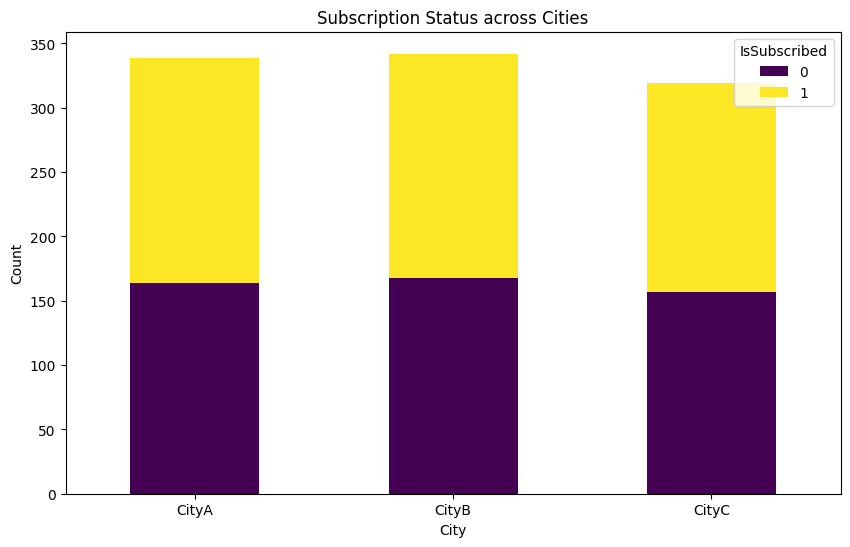

In [17]:
# Group by City and IsSubscribed
sub_data = df.groupby(['City', 'IsSubscribed']).size().unstack(fill_value=0)

# Stacked bar chart
sub_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Subscription Status across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='IsSubscribed')
plt.xticks(rotation=0)
plt.show()
